In [24]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
wine = datasets.load_wine(as_frame = True)

In [25]:
"""
Gradient Boost for regression predectis everything to be the
average of the target. Then it uses the features to predict the
error. It builds a tree and where catagorzie them with what is
in common. So the left side has this trait the right has this trait.
Range of leafs in the tree is usally 8 to 32. It also uses a learning
rate. Learning rate is multiped aganst the predidcted error. It can
make multiple trees. It for each esitemd residual, it will add it
together. This new tree will predidct the new residuals from
previous tree.

inital leage + estimed resdial from tree 1 + estimed resdial from tree 2...

"""

'\nGradient Boost for regression predectis everything to be the \naverage of the target. Then it uses the features to predict the\nerror. It builds a tree and where catagorzie them with what is \nin common. So the left side has this trait the right has this trait.\nRange of leafs in the tree is usally 8 to 32. It also uses a learning\nrate. Learning rate is multiped aganst the predidcted error. It can\nmake multiple trees. It for each esitemd residual, it will add it\ntogether. This new tree will predidct the new residuals from\nprevious tree.\n\ninital leage + estimed resdial from tree 1 + estimed resdial from tree 2...\n\n'

In [26]:
X = wine["data"]
y = wine["target"]

print(X,y)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=17)

In [28]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
cross_val_score(gbr,X_train,y_train, cv = 3, n_jobs=-1).mean()

0.9221335697399526

In [30]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [.0001, .001, .01, .1,1 ],
    'max_depth': [3,5,7,9]
}

In [31]:
gbr2 = GridSearchCV(gbr, param_grid, cv = 3, n_jobs = -1)
gbr2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 500]})

In [32]:
gbr2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [33]:
gbr2.best_score_

0.9434101654846335

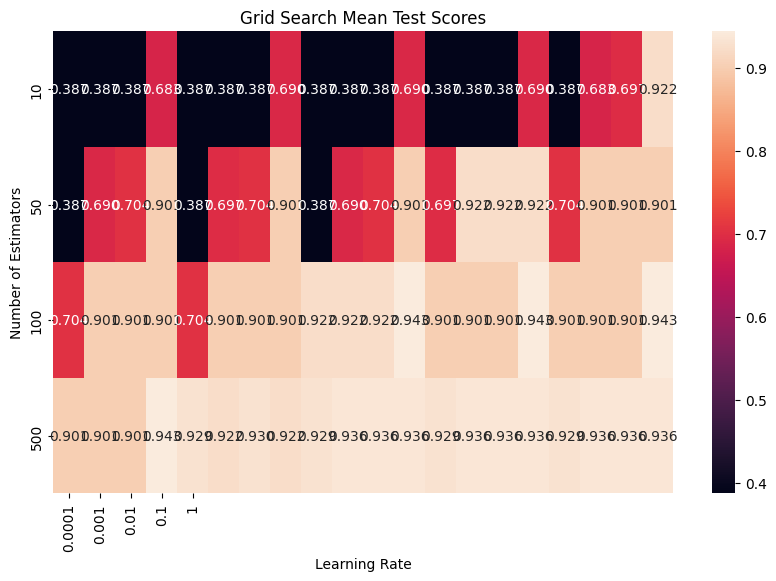

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# Extract results from the grid search
results = gbr2.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Reshape the mean test scores to match the parameter grid
heatmap_data = mean_test_scores.reshape(len(param_grid['n_estimators']), len(param_grid['learning_rate']) * len(param_grid['max_depth']))

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", xticklabels=param_grid['learning_rate'], yticklabels=param_grid['n_estimators'])
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('Grid Search Mean Test Scores')
plt.show()
